In [1]:
import pandas as pd

In [2]:
import mlflow
import os

In [3]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

In [4]:
os.environ["MLFLOW_S3_ENDPOINT_URL"] = 'https://storage.yandexcloud.net'
os.environ["AWS_ACCESS_KEY_ID"] = 'YCAJEryDs7iScbshPQ7BaUhes'
os.environ["AWS_SECRET_ACCESS_KEY"] = 'YCMl4tpgidAdLCoZRZ1lURSmOpgRQ12KhwO_tJkr'

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import numpy as np

In [7]:
df = pd.read_csv('/home/mle-user/mle_projects/mle-project-sprint-2-v001/mlflow_server/initial_data.csv')

In [5]:
df.head()

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,studio,total_area,price
0,1,1965,6,55.717113,37.781120,2.64,84,12,True,9,9.9,19.900000,1,False,False,35.099998,9500000.0
1,2,2001,2,55.794849,37.608013,3.00,97,10,True,7,0.0,16.600000,1,False,False,43.000000,13500000.0
2,3,2000,4,55.740040,37.761742,2.70,80,10,True,9,9.0,32.000000,2,False,False,56.000000,13500000.0
3,4,2002,4,55.672016,37.570877,2.64,771,17,True,1,10.1,43.099998,3,False,False,76.000000,20000000.0
4,5,1971,1,55.808807,37.707306,2.60,208,9,True,3,3.0,14.000000,1,False,False,24.000000,5200000.0


Узнаем, есть ли пропущенные значения в датасете

In [8]:
df.isnull().sum()

id                   0
build_year           0
building_type_int    0
latitude             0
longitude            0
ceiling_height       0
flats_count          0
floors_total         0
has_elevator         0
floor                0
kitchen_area         0
living_area          0
rooms                0
is_apartment         0
studio               0
total_area           0
price                0
dtype: int64

Узнаем размер датасета

In [6]:
df.shape

(141362, 17)

Выясним корреляцию между числовыми признаками и отдельно построим графики scatterplot взаимосвязи признаков с целевой переменной

In [10]:
num_feats = df.select_dtypes(include=['float','int'])

In [18]:
corr = num_feats.corr()
corr

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,kitchen_area,living_area,rooms,total_area,price
id,1.000000,0.015787,-0.027255,0.018954,-0.001770,0.035455,0.007846,0.025125,0.017120,0.022018,0.065656,0.019923,0.028206,0.010035
build_year,0.015787,1.000000,0.019930,-0.191949,-0.171301,0.111662,0.362539,0.640599,0.400662,0.272415,0.025640,-0.001414,0.193599,0.055736
building_type_int,-0.027255,0.019930,1.000000,-0.014453,0.110847,-0.508794,-0.010078,0.015777,-0.002294,-0.127506,-0.164934,-0.203300,-0.272908,-0.108486
latitude,0.018954,-0.191949,-0.014453,1.000000,-0.043470,0.004689,-0.105599,-0.045768,-0.024643,-0.048753,0.035389,0.031493,0.003808,0.013576
longitude,-0.001770,-0.171301,0.110847,-0.043470,1.000000,-0.076445,-0.074484,-0.126123,-0.073421,-0.088537,-0.031253,-0.038027,-0.084823,-0.025437
ceiling_height,0.035455,0.111662,-0.508794,0.004689,-0.076445,1.000000,0.018740,0.135840,0.091332,0.221721,0.236229,0.295207,0.459843,0.222369
flats_count,0.007846,0.362539,-0.010078,-0.105599,-0.074484,0.018740,1.000000,0.453993,0.275365,0.089382,-0.021926,-0.039202,-0.020227,-0.040608
floors_total,0.025125,0.640599,0.015777,-0.045768,-0.126123,0.135840,0.453993,1.000000,0.614042,0.254012,0.066403,0.029287,0.170859,0.023052
floor,0.017120,0.400662,-0.002294,-0.024643,-0.073421,0.091332,0.275365,0.614042,1.000000,0.169557,0.074290,0.040486,0.147032,0.027507
kitchen_area,0.022018,0.272415,-0.127506,-0.048753,-0.088537,0.221721,0.089382,0.254012,0.169557,1.000000,0.418376,0.202198,0.328477,0.090146


<Axes: >

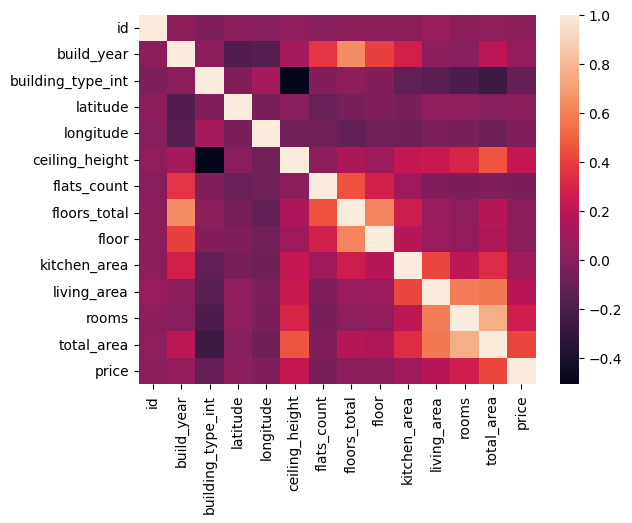

In [17]:
sns.heatmap(data=corr)

Построим графики scatterplot для каждой пары признаков

<function matplotlib.pyplot.show(close=None, block=None)>

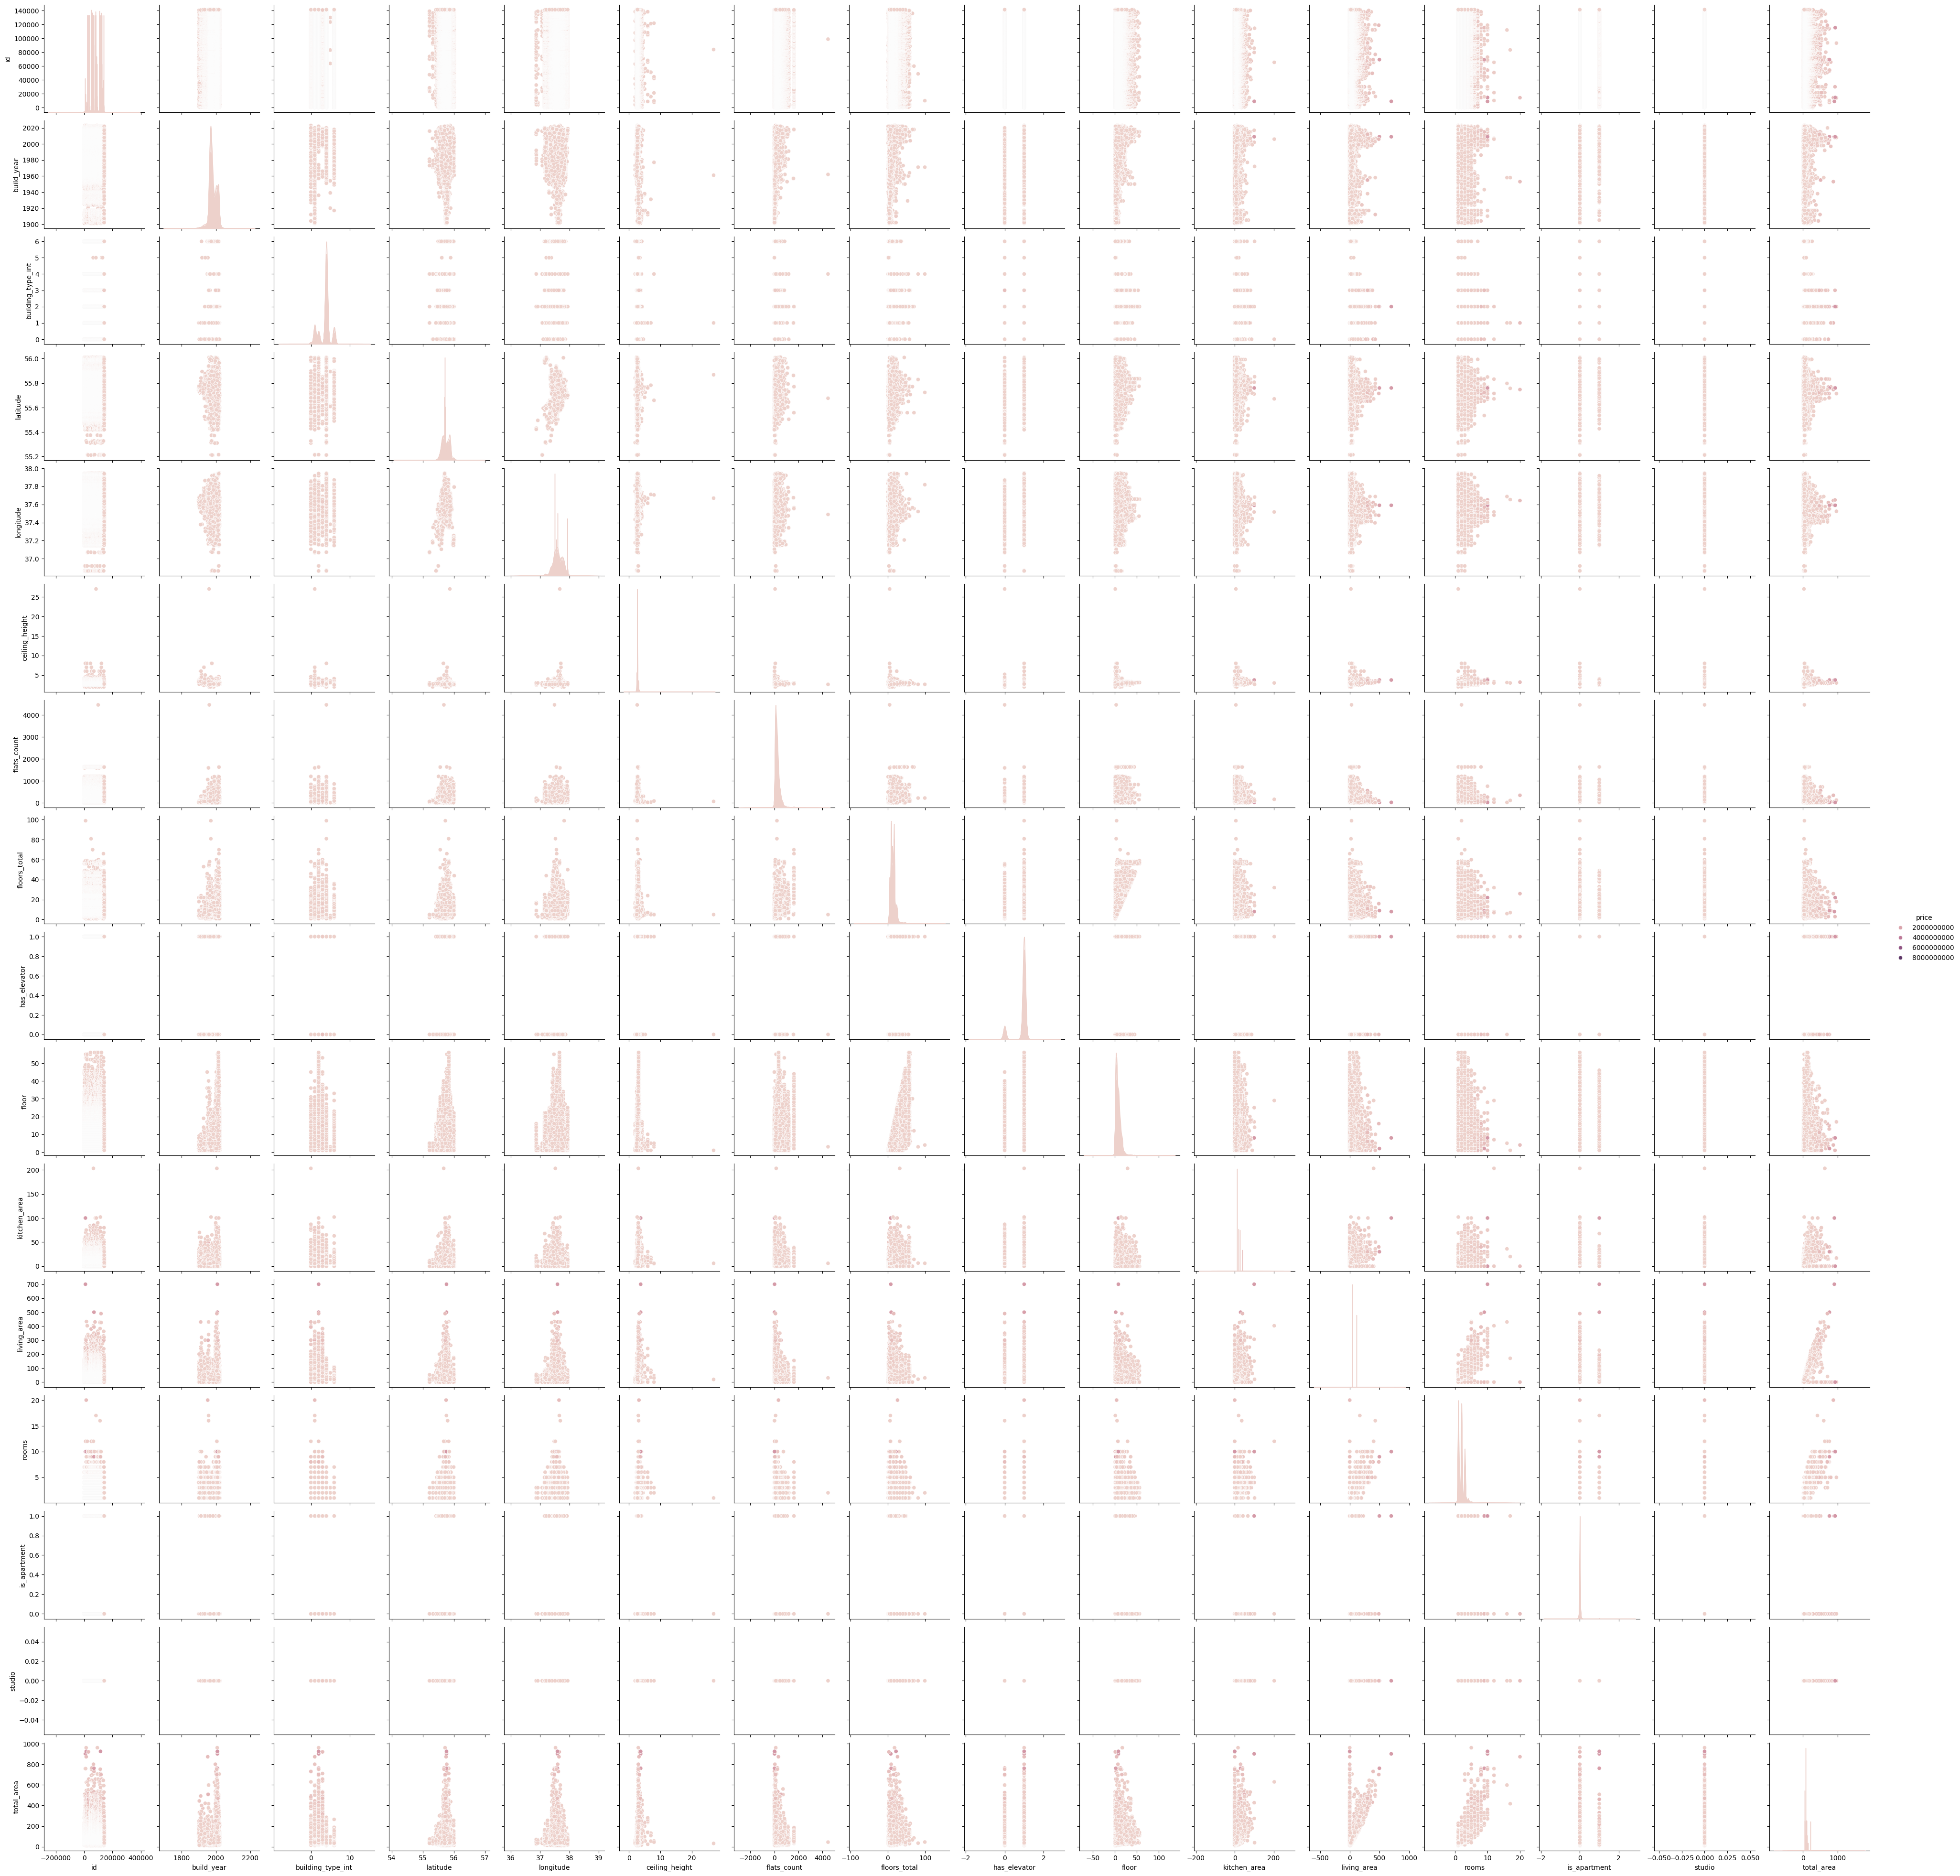

In [9]:
sns.pairplot(df,hue='price')
plt.show()

Узнаем, сколько выбросов в данных

In [6]:
k = 1.5
pot_outliers = pd.DataFrame()
outliers = []
for col in df.select_dtypes(include='float').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    margin = IQR*k
    lower = q1-margin
    upper = q3+margin
    pot_outliers[col] = ~df[col].between(lower,upper)

    
outliers = pot_outliers.any(axis=1)


In [18]:
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
141357    False
141358    False
141359    False
141360    False
141361    False
Length: 141362, dtype: bool

In [15]:
df[outliers]

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,studio,total_area,price
34,35,1992,4,55.983387,37.152309,2.64,379,14,True,8,8.5,19.000000,1,False,False,38.000000,5800000.0
48,49,2004,2,55.703480,37.511040,3.00,284,17,True,8,14.0,64.800003,3,False,False,93.300003,37000000.0
49,50,2012,2,55.827671,37.487568,3.10,327,40,True,22,12.0,60.000000,2,False,False,94.000000,22450000.0
58,59,2019,3,55.708664,37.590256,3.15,301,10,True,9,0.0,0.000000,3,False,False,126.000000,39500000.0
68,69,2017,2,55.760914,37.550209,3.20,105,12,True,5,0.0,0.000000,3,False,False,90.000000,95000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141338,141339,2010,2,55.715485,37.479034,3.00,183,24,True,24,0.0,110.000000,5,False,False,184.000000,92000000.0
141340,141341,2012,2,55.744308,37.419521,3.00,332,40,True,39,10.0,80.000000,2,False,False,112.000000,45000000.0
141341,141342,2008,2,55.663673,37.486732,3.00,667,33,True,27,16.0,73.000000,3,False,False,104.699997,33400000.0
141344,141345,2005,2,55.681267,37.582401,2.80,107,17,True,14,17.1,80.199997,3,False,False,136.000000,30000000.0


In [16]:
df.shape

(141362, 17)

In [7]:
df = df.drop(df[outliers].index)

In [29]:
df.shape

(117289, 17)

In [20]:
cat_features = df.select_dtypes(exclude='float').columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141362 entries, 0 to 141361
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 141362 non-null  int64  
 1   build_year         141362 non-null  int64  
 2   building_type_int  141362 non-null  int64  
 3   latitude           141362 non-null  float64
 4   longitude          141362 non-null  float64
 5   ceiling_height     141362 non-null  float64
 6   flats_count        141362 non-null  int64  
 7   floors_total       141362 non-null  int64  
 8   has_elevator       141362 non-null  bool   
 9   floor              141362 non-null  int64  
 10  kitchen_area       141362 non-null  float64
 11  living_area        141362 non-null  float64
 12  rooms              141362 non-null  int64  
 13  is_apartment       141362 non-null  bool   
 14  studio             141362 non-null  bool   
 15  total_area         141362 non-null  float64
 16  pr

Воспользуемся Pandas Profiling для большей информации

In [6]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [7]:
from ydata_profiling import ProfileReport

df_copy = df

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

profile_report

profile_report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='rooms', ylabel='price'>

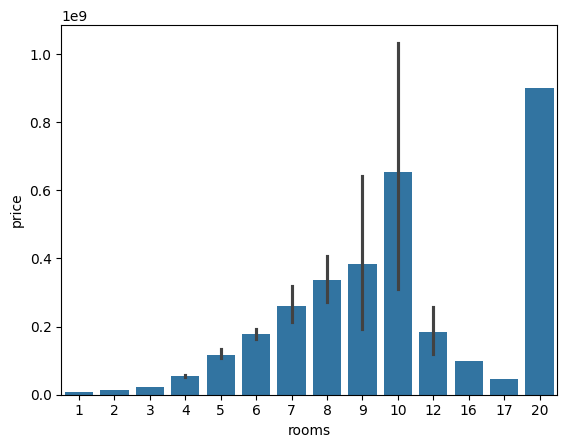

In [13]:
sns.barplot(data=df,x='rooms',y='price')

Проанализируем также категориальные признаки

<Axes: xlabel='has_elevator', ylabel='price'>

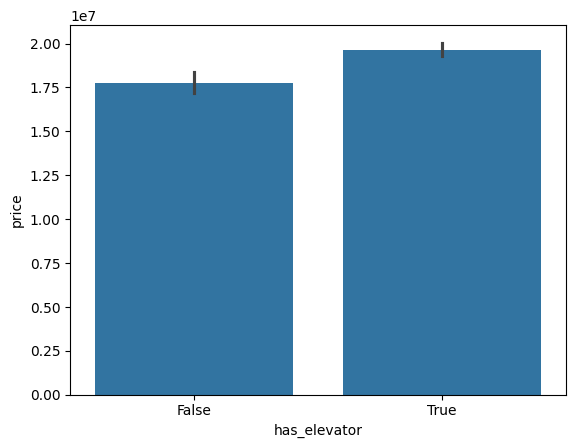

In [14]:
sns.barplot(data=df,x='has_elevator',y='price')

<Axes: xlabel='is_apartment', ylabel='price'>

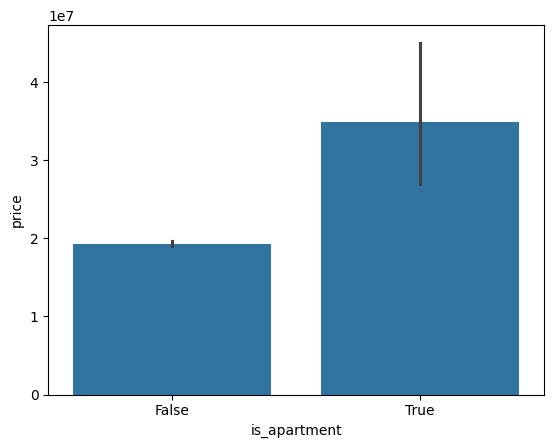

In [15]:
sns.barplot(data=df,x='is_apartment',y='price')

Изучим распределение целевой переменной

<Axes: xlabel='price', ylabel='Count'>

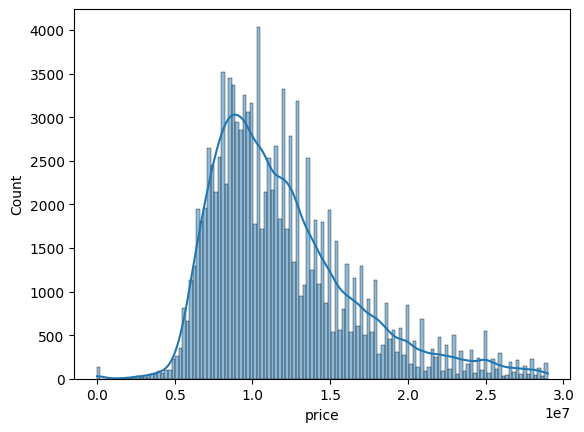

In [32]:
sns.histplot(x='price',data=df,kde=True)

Распределение целевой переменной близко к нормальному

In [21]:
corr

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,kitchen_area,living_area,rooms,total_area,price
id,1.000000,0.015787,-0.027255,0.018954,-0.001770,0.035455,0.007846,0.025125,0.017120,0.022018,0.065656,0.019923,0.028206,0.010035
build_year,0.015787,1.000000,0.019930,-0.191949,-0.171301,0.111662,0.362539,0.640599,0.400662,0.272415,0.025640,-0.001414,0.193599,0.055736
building_type_int,-0.027255,0.019930,1.000000,-0.014453,0.110847,-0.508794,-0.010078,0.015777,-0.002294,-0.127506,-0.164934,-0.203300,-0.272908,-0.108486
latitude,0.018954,-0.191949,-0.014453,1.000000,-0.043470,0.004689,-0.105599,-0.045768,-0.024643,-0.048753,0.035389,0.031493,0.003808,0.013576
longitude,-0.001770,-0.171301,0.110847,-0.043470,1.000000,-0.076445,-0.074484,-0.126123,-0.073421,-0.088537,-0.031253,-0.038027,-0.084823,-0.025437
ceiling_height,0.035455,0.111662,-0.508794,0.004689,-0.076445,1.000000,0.018740,0.135840,0.091332,0.221721,0.236229,0.295207,0.459843,0.222369
flats_count,0.007846,0.362539,-0.010078,-0.105599,-0.074484,0.018740,1.000000,0.453993,0.275365,0.089382,-0.021926,-0.039202,-0.020227,-0.040608
floors_total,0.025125,0.640599,0.015777,-0.045768,-0.126123,0.135840,0.453993,1.000000,0.614042,0.254012,0.066403,0.029287,0.170859,0.023052
floor,0.017120,0.400662,-0.002294,-0.024643,-0.073421,0.091332,0.275365,0.614042,1.000000,0.169557,0.074290,0.040486,0.147032,0.027507
kitchen_area,0.022018,0.272415,-0.127506,-0.048753,-0.088537,0.221721,0.089382,0.254012,0.169557,1.000000,0.418376,0.202198,0.328477,0.090146


In [24]:
df['building_type_int']

0         6
1         2
2         4
3         4
4         1
         ..
141357    4
141358    1
141359    4
141360    4
141361    4
Name: building_type_int, Length: 141362, dtype: int64

Выводы EDA:
1) пропуски отсутствуют, так как они были обработаны в предыдущем проекте
2) распределение целевой переменной близко к нормальному
3) наблюдается высокая корреляция следующих признаков:
- build_year и floors_total
- floor и floors_total
- living_area и rooms
- living_area и total_area
- rooms и total_area
4) наиболее сильно с целевой переменной коррелирует признак total_area
5) другие признаки слабо коррелируют с целевой переменной
6) исходя из пункта 5 линейная и полиномиальная регрессия скорее всего будет плохо работать на этих данных
7) в данных нет категориальных признаков. Имеются только признаки int, float и bool
7) так как данных много, зависимости нелинейные, здесь будет хорошо  работать случайный лес
8) признак id не несет в себе никакой полезной информации, признак studio тоже, так как все значения там - False, эти признаки лучше удалить


Импортируем библиотеки и удалим выбросы


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
k = 1.5
pot_outliers = pd.DataFrame()
outliers = []
for col in df.select_dtypes(include='float').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    margin = IQR*k
    lower = q1-margin
    upper = q3+margin
    pot_outliers[col] = ~df[col].between(lower,upper)

    
outliers = pot_outliers.any(axis=1)


In [11]:
df = df.drop(df[outliers].index)

In [12]:
df.shape

(117289, 17)

In [13]:
X = df.drop(['price','id','studio'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
num_feats = X.select_dtypes(include=['float','int']).columns.tolist()

In [15]:
bool_feats = X.select_dtypes(include='bool').columns.tolist()

In [40]:
experiment = mlflow.get_experiment_by_name('baseline_improvement')

In [41]:
experiment_id = experiment.experiment_id

In [42]:
experiment_id

'11'

Проверим результаты работы модели без выбросов и с 4-мя трансформациями

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler,PolynomialFeatures,KBinsDiscretizer, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)

preprocessor = ColumnTransformer(
    [
        ('qn',QuantileTransformer(),num_feats),
        ('rb',RobustScaler(),num_feats),
        ('poly',PolynomialFeatures(degree=2),num_feats),
        ('kbins',KBinsDiscretizer(n_bins=5),num_feats),
        ('bool',OneHotEncoder(drop='if_binary'),bool_feats),
        
    ],
    remainder='drop',
    verbose_feature_names_out=False

)
pipeline = Pipeline(
    [
    ('preprocessing',preprocessor),
    ('model',model)

    ]
)

pipeline.fit(X_train,y_train)


/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('qn', QuantileTransformer(),
                                                  ['build_year',
                                                   'building_type_int',
                                                   'latitude', 'longitude',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'floor',
                                                   'kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area']),
                                                 ('rb', RobustScaler(),
                                                  ['build_year',
                                                   'building_type_int',
                                                   'latitude', 'longitude',
                                                   'ceiling_height'...
                                                   'total_area']),
                                                 ('kbins', KBinsDiscretizer(),
                                                  ['build_year',
                                                   'building_type_int',
                                                   'latitude', 'longitude',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'floor',
                                                   'kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area']),
                                                 ('bool',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['has_elevator',
                                                   'is_apartment'])],
                                   verbose_feature_names_out=False)),
                ('model', RandomForestRegressor(n_jobs=-1))])

In [23]:
import numpy as np

In [22]:

prediction = pipeline.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mape = mean_absolute_percentage_error(y_test,prediction)

In [25]:
rmse

2216266.6659180066

In [26]:
mape

1.1000114819876785

In [27]:
metrics = {'rmse':rmse,'mape':mape}

In [28]:
metrics

{'rmse': 2216266.6659180066, 'mape': 1.1000114819876785}

Результаты после удаления выбросов значительно улучшились

In [25]:
import joblib
pipeline = joblib.load('pipeline.pkl')

In [29]:
RUN_NAME = 'model without outliers'

In [31]:
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_info = run.info.run_id
    mlflow.log_artifact('/home/mle-user/mle_projects/mle-project-sprint-2-v001/model_improvement/report.html')
    mlflow.log_artifact('/home/mle-user/mle_projects/mle-project-sprint-2-v001/model_improvement/conclusion.md')
    mlflow.log_artifact('/home/mle-user/mle_projects/mle-project-sprint-2-v001/model_improvement/project.ipynb')
    mlflow.log_metrics(metrics)
    model_info = mlflow.sklearn.log_model(sk_model=model,artifact_path='models',registered_model_name=REGISTRY_MODEL_NAME,pip_requirements=pip_requirements,signature=signature)

2024/07/27 07:51:16 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.14.2, required: mlflow==2.7.1)
 - scikit-learn (current: 1.5.1, required: scikit-learn==1.3.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Registered model 'price_prediction_model' already exists. Creating a new version of this model...
2024/07/27 07:51:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: price_prediction_model, version 5
Created version '5' of model 'price_prediction_model'.


In [88]:
REGISTRY_MODEL_NAME = 'price_prediction_model'
pip_requirements = '/home/mle-user/mle_projects/mle-project-sprint-2-v001/requirements.txt'
signature = mlflow.models.infer_signature(X_test,prediction)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)

Проверим теперь как работает модель без OneHotEncoder, а также добавим SFS. OneHotEncoder удаляется по двум причинам: 1) Он будет сильно замедлять SFS, 2) Случайный лес и без преобразований может обрабатывать булевые значения. Также, по причине нехватки места на диске надо удалить часть затратных по памяти преобразований для числовых колонок

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder

preprocessor = ColumnTransformer(
    [
        ('qn',QuantileTransformer(),num_feats),
        ('bool','passthrough',bool_feats),
        
    ],
    remainder='drop',
    verbose_feature_names_out=False    

)
sfs = SFS(model,  k_features=8, forward=True, floating=True, scoring='neg_mean_squared_error', cv=2, n_jobs=-1)

pipeline = Pipeline(
    [
    ('preprocessing',preprocessor),
    ('feature_selection',sfs),
    ('model',model)

    ]
)

pipeline.fit(X_train,y_train)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('qn', QuantileTransformer(),
                                                  ['build_year',
                                                   'building_type_int',
                                                   'latitude', 'longitude',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'floor',
                                                   'kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area']),
                                                 ('bool', 'passthrough',
                                                  ['has_elevator',
                                                   'is_apartment'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection',
                 SequentialFeatureSelector(cv=2,
                                           estimator=RandomForestRegressor(n_jobs=-1),
                                           floating=True, k_features=(8, 8),
                                           n_jobs=-1,
                                           scoring='neg_mean_squared_error')),
                ('model', RandomForestRegressor(n_jobs=-1))])

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [36]:
prediction = pipeline.predict(X_test)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mape = mean_absolute_percentage_error(y_test,prediction)

In [38]:
rmse

2240148.7943102154

In [39]:
mape

1.1264188910149748

К сожалению, SFS с k_features=8 и cv=2 не дал необходимых результатов, результаты модели примерно на том же уровне



In [40]:
RUN_NAME = 'sfs_K8_cv2_model'


In [42]:
metrics = {'rmse':rmse,'mape':mape}

In [43]:
metrics

{'rmse': 2240148.7943102154, 'mape': 1.1264188910149748}

In [44]:
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_info = run.info.run_id
    mlflow.log_metrics(metrics)
    model_info = mlflow.sklearn.log_model(sk_model=model,artifact_path='models',registered_model_name=REGISTRY_MODEL_NAME,pip_requirements=pip_requirements,signature=signature)

2024/07/27 10:05:17 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.14.2, required: mlflow==2.7.1)
 - scikit-learn (current: 1.5.1, required: scikit-learn==1.3.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
Registered model 'price_prediction_model' already exists. Creating a new version of this model...
2024/07/27 10:05:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: price_prediction_model, version 6
Created version '6' of model 'price_prediction_model'.


Попробуем протестировать с k_features=10 и cv=4, а также сделаем параметр floating равный False

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder

preprocessor = ColumnTransformer(
    [
        ('qn',QuantileTransformer(),num_feats),
        ('bool','passthrough',bool_feats),
        
    ],
    remainder='drop',
    verbose_feature_names_out=False    

)
sfs = SFS(model,  k_features=10, forward=True, floating=False, scoring='neg_mean_squared_error', cv=4, n_jobs=-1)

pipeline = Pipeline(
    [
    ('preprocessing',preprocessor),
    ('feature_selection',sfs),
    ('model',model)

    ]
)

pipeline.fit(X_train,y_train)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('qn', QuantileTransformer(),
                                                  ['build_year',
                                                   'building_type_int',
                                                   'latitude', 'longitude',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'floor',
                                                   'kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area']),
                                                 ('bool', 'passthrough',
                                                  ['has_elevator',
                                                   'is_apartment'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection',
                 SequentialFeatureSelector(cv=4,
                                           estimator=RandomForestRegressor(n_jobs=-1),
                                           k_features=(10, 10), n_jobs=-1,
                                           scoring='neg_mean_squared_error')),
                ('model', RandomForestRegressor(n_jobs=-1))])

In [46]:
prediction = pipeline.predict(X_test)

In [47]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mape = mean_absolute_percentage_error(y_test,prediction)

In [48]:
rmse

2231851.0867010714

In [49]:
mape


1.0910326529039573

Результаты не стали сильно лучше, протестируем backward selection


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder

preprocessor = ColumnTransformer(
    [
        ('qn',QuantileTransformer(),num_feats),
        ('bool','passthrough',bool_feats),
        
    ],
    remainder='drop',
    verbose_feature_names_out=False    

)
sfs = SFS(model,  k_features=10, forward=False, floating=True, scoring='neg_mean_squared_error', cv=4, n_jobs=-1)

pipeline = Pipeline(
    [
    ('preprocessing',preprocessor),
    ('feature_selection',sfs),
    ('model',model)

    ]
)

pipeline.fit(X_train,y_train)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('qn', QuantileTransformer(),
                                                  ['build_year',
                                                   'building_type_int',
                                                   'latitude', 'longitude',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'floor',
                                                   'kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area']),
                                                 ('bool', 'passthrough',
                                                  ['has_elevator',
                                                   'is_apartment'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection',
                 SequentialFeatureSelector(cv=4,
                                           estimator=RandomForestRegressor(n_jobs=-1),
                                           floating=True, forward=False,
                                           k_features=(10, 10), n_jobs=-1,
                                           scoring='neg_mean_squared_error')),
                ('model', RandomForestRegressor(n_jobs=-1))])

In [57]:
prediction = pipeline.predict(X_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mape = mean_absolute_percentage_error(y_test,prediction)

In [59]:
rmse

2237669.8144919435

In [60]:
mape

1.109854354709236

In [66]:
import joblib
joblib.dump(pipeline,'sbs_pipeline.pkl')

['sbs_pipeline.pkl']

Результаты не стали сильно лучше. SFS не помогает сильно улучшить качество модели


In [ ]:
RUN_NAME = 'SBS_model'


In [61]:
metrics = {'rmse':rmse,'mape':mape}

In [65]:
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_info = run.info.run_id
    mlflow.log_metrics(metrics)
    model_info = mlflow.sklearn.log_model(sk_model=model,artifact_path='models',registered_model_name=REGISTRY_MODEL_NAME,pip_requirements=pip_requirements,signature=signature)

2024/07/27 12:14:56 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.14.2, required: mlflow==2.7.1)
 - scikit-learn (current: 1.5.1, required: scikit-learn==1.3.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


S3UploadFailedError: Failed to upload /tmp/tmpxqvk7oyl/model/python_env.yaml to s3-student-mle-20240523-9a4b29d5bb/11/39aa6450d05340f0a152728388f77fc9/artifacts/models/python_env.yaml: An error occurred (BucketMaxSizeExceeded) when calling the PutObject operation: You have attempted to exceed the max size configured for the bucket.

Теперь добавим новых признаков с помощью autofeat

In [16]:
from autofeat import AutoFeatRegressor


In [17]:
feats = X.columns.tolist()

In [18]:
transformations = ('1/','log','abs','sqrt')
afc = AutoFeatRegressor(transformations=transformations, feateng_steps=1, n_jobs=-1,feateng_cols=feats)

In [19]:
X_train = afc.fit_transform(X_train,y_train)

In [20]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder

preprocessor = ColumnTransformer(
    [
        ('qn',QuantileTransformer(),num_feats),
        ('bool','passthrough',bool_feats),
        
    ],
    remainder='drop',
    verbose_feature_names_out=False    

)



X_train2 = preprocessor.fit_transform(X_train2,y_train)

In [22]:
X_train_combined = np.hstack([X_train2,X_train])

In [23]:
X_test = afc.transform(X_test)

In [24]:
X_test2 = preprocessor.transform(X_test2)

In [25]:
X_test_combined = np.hstack([X_test2,X_test])

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)

In [33]:
model.fit(X_train_combined,y_train)

RandomForestRegressor(n_jobs=-1)

In [34]:
prediction = model.predict(X_test_combined)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mape = mean_absolute_percentage_error(y_test,prediction)

NameError: name 'prediction' is not defined

In [81]:
rmse

2237106.7695971658

In [82]:
mape

1.0990854883458474

Новые признаки, сгенерированные autofeat также не помогли сильно улучшить модель


In [37]:
metrics = {'rmse':rmse,'mape':mape}

In [37]:
REGISTRY_MODEL_NAME = 'price_prediction_model'
pip_requirements = '/home/mle-user/mle_projects/mle-project-sprint-2-v001/requirements.txt'
signature = mlflow.models.infer_signature(X_test,prediction)

In [41]:
with mlflow.start_run(run_name='autofeat_model',experiment_id=experiment_id) as run:
    run_info = run.info.run_id
    mlflow.log_metrics(metrics)
    #model_info = mlflow.sklearn.log_model(sk_model=model,artifact_path='models',registered_model_name=REGISTRY_MODEL_NAME,pip_requirements=pip_requirements,signature=signature)

In [42]:
run_info

'e66387636b7a496489ba4cf14c0e99df'

In [43]:
with mlflow.start_run(run_id=run_info,experiment_id=experiment_id) as run:
    run_info = run.info.run_id
    mlflow.log_metrics(metrics)
    model_info = mlflow.sklearn.log_model(sk_model=model,artifact_path='models',registered_model_name=REGISTRY_MODEL_NAME,pip_requirements=pip_requirements,signature=signature)

2024/07/27 15:08:09 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.14.2, required: mlflow==2.7.1)
 - scikit-learn (current: 1.5.1, required: scikit-learn==1.3.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/ml

S3UploadFailedError: Failed to upload /tmp/tmpgo5qyktv/model/python_env.yaml to s3-student-mle-20240523-9a4b29d5bb/11/e66387636b7a496489ba4cf14c0e99df/artifacts/models/python_env.yaml: An error occurred (BucketMaxSizeExceeded) when calling the PutObject operation: You have attempted to exceed the max size configured for the bucket.

Проведём подбор гиперпараметров с помощью optuna

In [26]:
import optuna

In [1]:
from optuna.integration.mlflow import MLflowCallback
from mlflow.utils.mlflow_tags import MLFLOW_PARENT_RUN_ID

In [ ]:
mlflow.start_run(run_name='optuna',experiment_id=experiment_id) as run:
    run_info = run.info.run_id

In [ ]:
mlflc = MLflowCallback(tracking_uri=f'http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}',metric_name='rmse',create_experiment=False,mlflow_kwargs={'experiment_id': experiment_id, 'tags': {MLFLOW_PARENT_RUN_ID: run_info}})

In [ ]:
def objective(trial: optuna.Trial):
    param ={
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth",10,100),
        "min_samples_split": trial.suggest_int("min_samples_split",2,10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf",1,10),
        "bootstrap": trial.suggest_categorical("bootstrap",[True,False]),


    }
    model = RandomForestRegressor(**param)
    model.fit(X_train,y_train),
    prediction = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    mape = mean_absolute_percentage_error(y_test,prediction)
    metrics = {"rmse":rmse,"mape":mape}
    return rmse

In [ ]:
mlflc = MLflowCallback(tracking_uri=f'http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}',metric_name='rmse',create_experiment=False,mlflow_kwargs={'experiment_id': experiment_id, 'tags': {MLFLOW_PARENT_RUN_ID: run_info}})
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(), study_name='TPE_study', direction='minimize')
study.optimize(objective,n_trials=100,callbacks=[mlflc])

Видно, что на 18 попытке получился наилучший результат, который дальше не улучшался

Trial 18 finished with value: 2230599.3340750067 and parameters: {'n_estimators': 184, 'max_depth': 78, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 18 with value: 2230599.3340750067.
Также оценим trial 15 {'n_estimators': 114, 'max_depth': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True} и trial 14 {'n_estimators': 124, 'max_depth': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}

Видно, что наилучшие результаты достигаются при min_samples_split = 2, min_samples_leaf = 1 и bootstrap = True. Проведём GridSearch параметров n_estimators и max_depth в диапазоне от 100 до 130 и от 80 до 100 соответственно

In [ ]:
params ={
        "n_estimators": np.arange(100,130,1),
        "max_depth": (80,100,1),

    }
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(min_samples_leaf=1,min_samples_split=2,bootstrap=True)
cv = GridSearchCV(estimator=model,param_grid=params,cv=2,scoring='neg_mean_squared_error',n_jobs=-1)
grid_model = cv.fit(X_train,y_train)
best_params = grid_model.best_params_

Лучшими результатами оказались n_estimators=117,max_depth=80

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [29]:
model = RandomForestRegressor(n_estimators=117,max_depth=80,min_samples_leaf=1,min_samples_split=2,bootstrap=True)
model.fit(X_train_combined,y_train)
prediction = model.predict(X_test_combined)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mape = mean_absolute_percentage_error(y_test,prediction)
metrics = {"rmse":rmse,"mape":mape}

In [46]:
with mlflow.start_run(run_name='optimized_model',experiment_id=experiment_id) as run:
    run_info = run.info.run_id
    mlflow.log_metrics(metrics)
    model_info = mlflow.sklearn.log_model(sk_model=model,artifact_path='models',registered_model_name=REGISTRY_MODEL_NAME,pip_requirements=pip_requirements,signature=signature)

2024/08/02 18:31:34 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.14.2, required: mlflow==2.7.1)
 - scikit-learn (current: 1.5.1, required: scikit-learn==1.3.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024-08-02 18:31:34,323 INFO: Found credentials in environment variables.
Registered model 'price_prediction_model' already exists. Creating a new version of this model...
2024/08/02 18:31:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: price_prediction_model, version 8
Created version '8' of model 'price_prediction_model'.
